In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
with tf.name_scope('Variables'):
    x = tf.placeholder(tf.float32, [None, 784])
with tf.name_scope('weights'):
    W = tf.Variable(tf.zeros([784, 10]))
with tf.name_scope('biases'):
    b = tf.Variable(tf.zeros([10]))

In [4]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [5]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [6]:
with tf.name_scope('total'):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [7]:
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [8]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [9]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [10]:
with tf.name_scope('correct_prediction'):
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [11]:
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.914


In [13]:
writer = tf.summary.FileWriter('/home/bsc3/Tensorflow/logs',sess.graph)

In [14]:
first_image = mnist.test.images[1]
image = np.array(first_image, dtype='float')

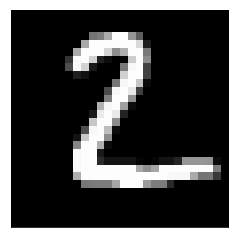

In [15]:
plt.imshow(image.reshape(28,28),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()